#### Fractional Laplace implementation

Evaluating the discrete fractional Laplacian

\begin{align*}
        (- \Delta_h)^{\frac{\alpha}{2}} u_j = \frac{1}{h^\alpha} \sum_{m \neq j} (u_j - u_m) K^{\alpha}(j-m),
\end{align*}
where the discrete kernel $K_\alpha$ is defined as 

\begin{equation}    K_\alpha(j) = \frac{2^\alpha \Gamma(\frac{1+\alpha}{2}) \Gamma(|j| - \frac{\alpha}{2})}{ |\Gamma(-\frac{\alpha}{2})| \Gamma(|j| + 1 + \frac{\alpha}{2})}.
\end{equation}

#### Discrete fractional Laplacian approximation.

Fix a truncation radius $R \gg 1$. Then, we let 
\begin{align*}
        (- \Delta_h)^{\frac{\alpha}{2}} u_j = \frac{1}{h^\alpha} \sum_{m = j-R, \\ j \neq m}^{j+R} (u_j - u_m) K_{\alpha}(j-m),
\end{align*}

In [1]:
using SpecialFunctions: gamma, loggamma, zeta

function gett(array::Vector{Float64}, index::Int, uBC::Float64) # get_index of array with fixed boundary values.
    # Check if the index is within the bounds of the array
    if index >= 1 && index <= length(array)
        return array[index]  # Return the item at the specified index
    else
        return uBC
    end
end

function fractional_Laplacian_vec(u_vec, α, h, R, uBC)
    fracLap = zeros(Float64, length(u_vec))
    c_α = 2^α * gamma((1+ α)/2) / ( abs(gamma(-α/2)) * sqrt(π))
    K_α_vec = [exp( loggamma( abs(m) - α/2)  - loggamma( (abs(m) + 1 + α/2) )  ) for m in 1:R]
    F_2_factor= c_α/(h^α)*2*( zeta(1+α) - sum([1/m^(1 + α) for m in 1:(R-1)]) )
    for j in eachindex(u_vec)
        fracLap[j] = fractional_Laplacian(u_vec, j, α,  c_α, h, R, K_α_vec, uBC, F_2_factor)
    end
    return fracLap
end

function fractional_Laplacian(u_vec, j, α, c_α, h, R, K_α_vec, uBC, F_2_factor)
    summ = 0
    for m in 1:R
        summ += (2*u_vec[j] - gett(u_vec, j+m, uBC) - gett(u_vec, j-m, uBC))*K_α_vec[m]
    end
    return c_α/(h^α) * summ + F_2_factor*u_vec[j]
end

fractional_Laplacian (generic function with 1 method)

### Plotting the comparison of analytical and approximated ($F_1 + F_2$) fractional Laplacian

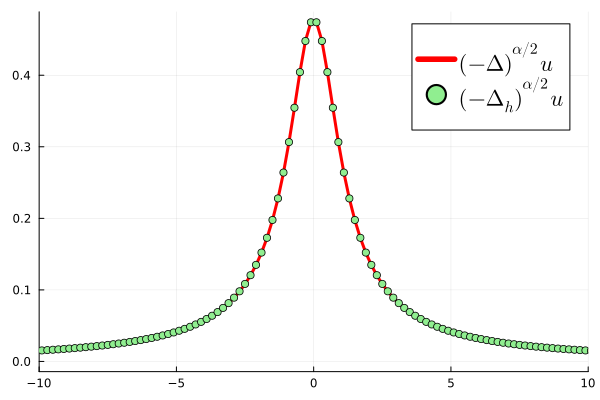

In [2]:
using LaTeXStrings
using Plots;
α = 0.5
s = α/2
x = range(-1000, 1000, length = 10000)
h = x[2] - x[1]
u_test_func(x) = (1 + x^2)^(-(1/2 - s))
u_test = u_test_func.(x)

mΔ_u = (x -> 4^s * gamma(1/2 + s) / gamma(1/2 - s) * (1 + x^2)^(-(1/2 + s))).(x)
plot(x, mΔ_u, color=:red, label =L"(-\Delta)^{α / 2} u", xlim=(-10,10), legendfontsize=15, lw=3) # 

mΔ_hu_disc3 = fractional_Laplacian_vec(u_test, α, h, 10000, u_test[1])
plot!(x, mΔ_hu_disc3, st = :scatter, color= :lightgreen, label = L"(-\Delta_h)^{α/2} u")
#savefig("../../Oppgaven/figures/discreteVscontiniousFractionalLaplace05.pdf")

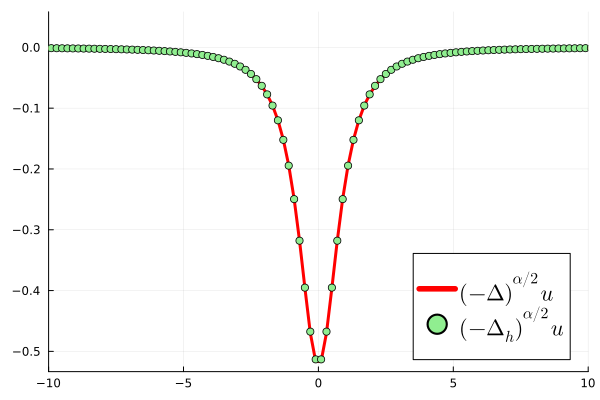

In [3]:
using LaTeXStrings
using Plots;
α = 1.5
s = α/2
x = range(-1000, 1000, length = 10000)
h = x[2] - x[1]
u_test_func(x) = (1 + x^2)^(-(1/2 - s))
u_test = u_test_func.(x)

mΔ_u = (x -> 4^s * gamma(1/2 + s) / gamma(1/2 - s) * (1 + x^2)^(-(1/2 + s))).(x)
plot(x, mΔ_u, color=:red, label =L"(-\Delta)^{α / 2} u", xlim=(-10,10), legendfontsize=15, lw=3) # 

mΔ_hu_disc3 = fractional_Laplacian_vec(u_test, α, h, 10000, u_test[1])
plot!(x, mΔ_hu_disc3, st = :scatter, color= :lightgreen, label = L"(-\Delta_h)^{α/2} u")
#savefig("../../Oppgaven/figures/discreteVscontiniousFractionalLaplace15.pdf")

#### Sanity check against $\alpha \to 2$

In [4]:
using LaTeXStrings
using Plots;
α = 1.99
s = α/2
x = range(-5, 5, length = 1000)
h = x[2] - x[1]
u_test_func(x) = exp(-x^2)
u_test = u_test_func.(x)
plot(x, u_test, label =L"u(x) = \exp(-x^2)", xlim=(-5,5), legendfontsize=14, lw=2) # 

mΔ_hu_disc = fractional_Laplacian_vec(u_test, α, h, 100000, u_test[1])


plot!(x, mΔ_hu_disc, st = :scatter, color= :lightgreen, label = L"(-\Delta_h)^{α/2} u", xlabel=L"x")
plot!(x, -d2u, st = :scatter, color= :red, label = L"-\Delta u", ma = 0.2)

UndefVarError: UndefVarError: `d2u` not defined

#### Sanity check against $\alpha \to 0$

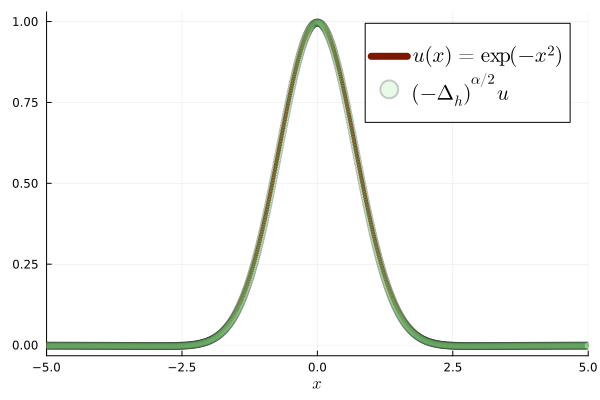

In [5]:
using LaTeXStrings
using Plots;
α = 0.01
s = α/2
x = range(-5, 5, length = 1000)
h = x[2] - x[1]
u_test_func(x) = exp(-x^2)
u_test = u_test_func.(x)



mΔ_hu_disc = fractional_Laplacian_vec(u_test, α, h, 10000, u_test[1]);
# mΔ_hu_cont = mΔ_σ_function(m_0_func, x, h, α, 10000)

plot(x, u_test, color=:roma, label =L"u(x) = \exp(-x^2)", xlim=(-5, 5), legendfontsize=14, lw=4) # 
plot!(x, mΔ_hu_disc, st = :scatter, color= :lightgreen, label = L"(-\Delta_h)^{α/2} u", xlabel=L"x", ma=0.2)

# savefig("../../Oppgaven/figures/limitingFractionalLaplaceto0.pdf");

----------------

### Convergence to fractional Laplacian

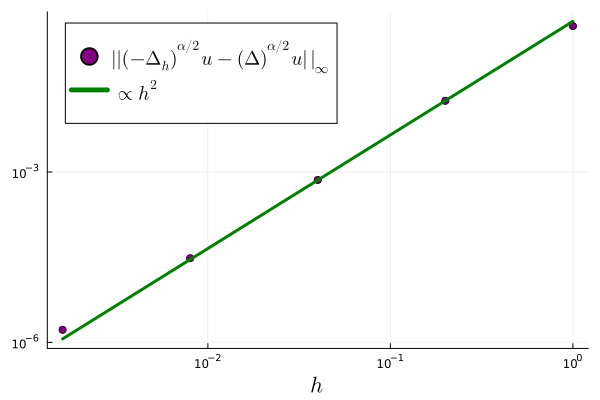

In [6]:
using LaTeXStrings
using Plots;
using Interpolations;

α = 1.5
s = α/2
u_test_func(x) = exp(-x^2)

#bencmark sizes
h_good = 0.001
x_good = -5:h_good:5
u_good = u_test_func.(x_good)
fL_good = fractional_Laplacian_vec(u_good, α, h_good, 10000, u_good[1]);

#error checking
h_vec = [5.0^i for i in 0:-1:-4]
errs = Array{Float64}(undef, length(h_vec))
for i in eachindex(h_vec)
    h_bad = h_vec[i]
    x_bad = -5:h_bad:5
    u_bad = u_test_func.(x_bad)
    fL_bad = fractional_Laplacian_vec(u_bad, α, h_bad, 10000, u_bad[1]);
    fL_good_interp = linear_interpolation(x_good, fL_good).(x_bad)
    errs[i] = maximum(abs.(fL_bad .- fL_good_interp))
end


plot(h_vec, errs, st = :scatter, color=:purple, xaxis = :log, yaxis = :log, xlabel = L"h", 
label =L"|| (-\Delta_h)^{\alpha/2} u - (\Delta)^{\alpha/2} u||_{\infty}", legend=:topleft, legendfontsize=13, labelfontsize=15)
plot!(h_vec, 0.45*h_vec.^2, color = :green,  xaxis = :log, yaxis = :log, xlabel = L" h", label =L"\propto h^2", lw=3)

### Comparing verified implementation on real line with periodic DPL matrix

In [7]:
using SpecialFunctions: gamma, loggamma, zeta
function TS(m, α, N_h, R)
    if m==0
        return 0
    end
    K_α = 0.0
    for ν in -R:1:R
        K_α += exp( loggamma( abs(m - N_h*ν) - α/2 )  - loggamma( ( abs(m - N_h*ν) + 1 + α/2) )  )
    end
    return K_α
end
    

function create_DPL_matrix(N_h, α, h, R)
    DPL_mat = Matrix{Float64}(undef, N_h, N_h)
    zeta_term= zeta(1+α)
    for i in 1:N_h
        for j in 1:N_h
            DPL_mat[i,j] = TS(abs(i-j), α, N_h, R)
        end
    end
    for γ in 1:N_h
        DPL_mat[γ, γ] = -(sum([TS(β-γ, α, N_h, R) for β in 1:N_h]) + 2*zeta_term - 
        sum([1/k^(1+α) for k in 1:((R+1)*N_h - γ) ]) - sum([1/k^(1+α) for k in 1:(R*N_h + γ - 1) ]))
    end
    c_α = 2^α * gamma((1+α)/2) / (√π * abs(gamma(-α/2)) )
    return -c_α / (h^α) * DPL_mat
end


create_DPL_matrix (generic function with 1 method)

In [11]:
function mΔ_σ_function(u_func, x_arr, h, σ, R) # this is a rubbish implementation, without riemann zeta. But works for high alpha.
    Δ_hU = Array{Float64}(undef, length(x_arr))
    cs = 2^(σ) * gamma((1 + σ)/2) / ( h^(σ) * sqrt(π) * abs(gamma(- σ/2))  )
    for j in 1:length(x_arr)
        summ = 0
        for m in 1:R
            summ += (u_func(x_arr[j]) - u_func(x_arr[j] - h*m)) * kappa(h, -m, σ, cs) + (u_func(x_arr[j]) - u_func(x_arr[j] + h*m)) * kappa(h, m, σ, cs)
        end
    Δ_hU[j] = summ
    end
    return Δ_hU #returns vector of same length as vector in.
end

function kappa(h, j, σ, cs) # where gamma_vec is the vector of the two factors which is determined by σ. 
    # Verified is correct based on formula in paper Jakobsen et al. referred to, and agrees with Jakobsen et al.
    factor2 = exp( loggamma( abs(j) - σ/2)  - loggamma( (abs(j) + 1 + σ/2) )  )
    return cs * factor2
end

kappa (generic function with 1 method)

In [12]:
using Plots, LaTeXStrings;
h = 0.005
x = 0:h:(1-h)
α = 1.5
N_h = length(x)
R = 100
f_func(x) = sin(2*pi*x)
f_vec = sin.(2*pi*x)

DPL_matrix = create_DPL_matrix(N_h, α, h, R)
FL_matprod = DPL_matrix * f_vec

fl = mΔ_σ_function(f_func, x, h, α, 100000);

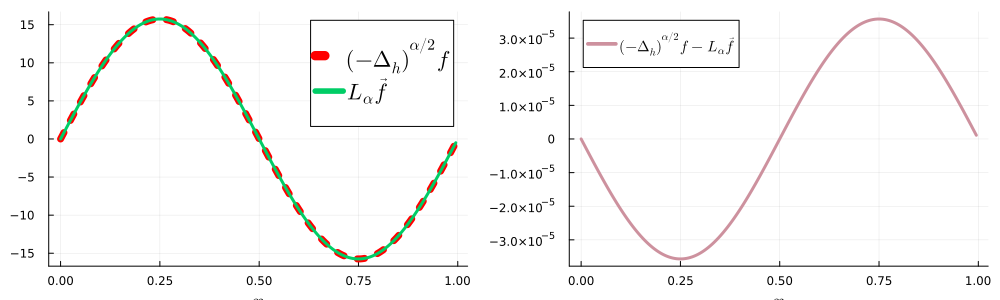

In [15]:
p1 =plot(x, fl, label=L"(-\Delta_h)^{\alpha/2} f", lw=7, color=:red, ls=:dot, legendfontsize=15, legend=:topright, xlabel=L"x", size=(600, 300), labelfontsize=15)
plot!(x, FL_matprod, label=L"L_\alpha \vec f", lw=3, color=:springgreen3)
p2 = plot(x, fl - FL_matprod, label=L"(-\Delta_h)^{\alpha/2} f - L_\alpha \vec f", legendfontsize=10,  xlabel=L"x", lw=3, color=:pink3, size=(400, 200), labelfontsize=15)

plot(p1, p2, layout=2, size=(1000, 300))